# Task # 4 - To Explore Decision Tree Algorithm

### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

In [1]:
#importing  essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
df=pd.read_csv("C:/Users/Jyotir/Downloads/Iris.csv")

# Data Preprocessing:-

In [3]:
# checking the head of data frame
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# checking whether there is nulll value in the data
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

there is no null value in the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# checking the datatypes of data 
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Exploratory Data Analysis

### lets check the correlation of the given features of data

In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [9]:
#Changing the target variable from Categorical to Numerical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()     #Label Encoding
label=LE.fit_transform(df["Species"])

In [10]:
#Dropping the unuseful columns
df=df.drop("Species", axis='columns')
df=df.drop("Id", axis='columns')

In [11]:
#appending the transformed column 
df["Species"]=label
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


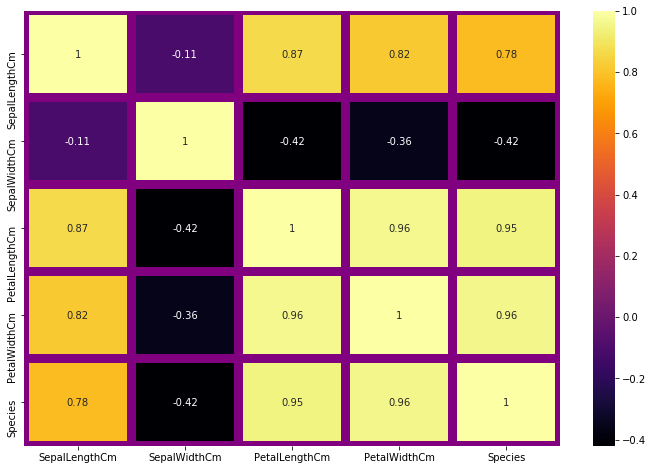

In [12]:
#Checking correlation between columns visually
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='inferno',lw=8,linecolor='purple'
           )

we can see that correlation between maximum features come out to be high

In [13]:
#Let's check the unique values of our target
df["Species"].unique()

array([0, 1, 2])

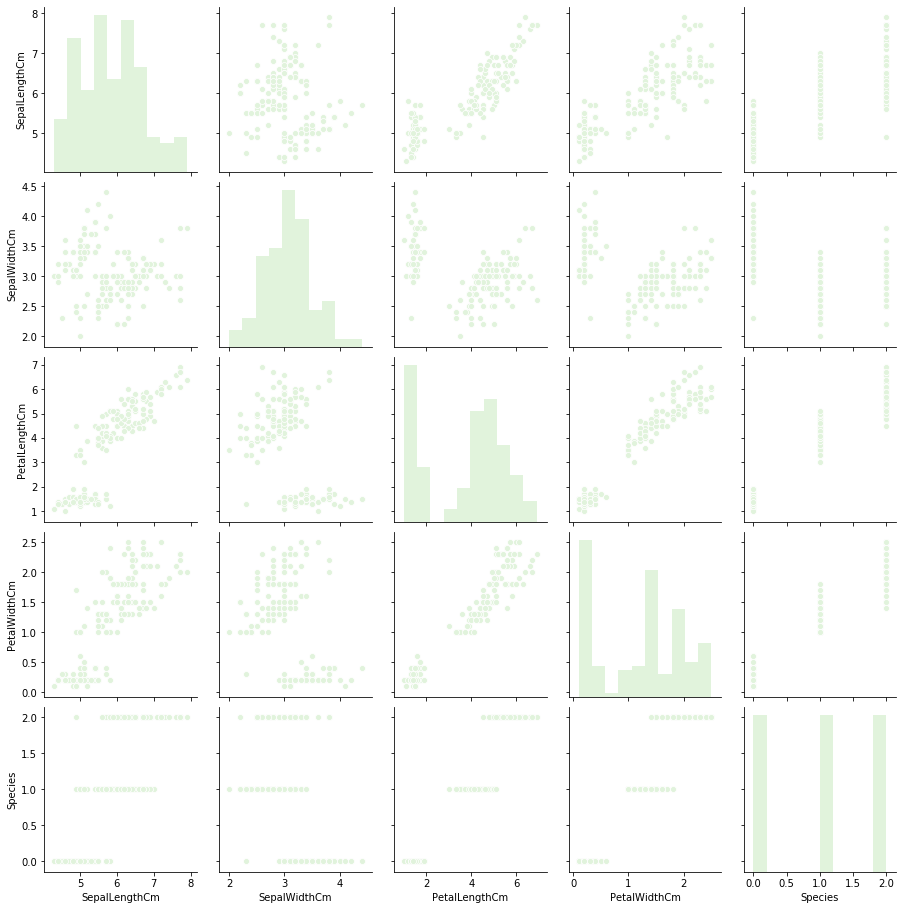

In [14]:
sns.set_palette('Greens')
sns.pairplot(df)

Splitting and storing into separate variables to apply ML model!

In [15]:
#Assigning the dependent and the independent variable
X=df.iloc[:, :-1].values
y=df.iloc[:, -1]


In [16]:

X.shape, y.shape

((150, 4), (150,))

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [17]:
#Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=0)

In [18]:
#Checking the shape of the training and the test data set
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


# Decision Tree Classifier Model:

In [19]:
#importing the model and data-fitting
from sklearn.tree import DecisionTreeClassifier
DTT=DecisionTreeClassifier(random_state=0)
DTT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:

#Let's predict with the test dataset
y_pred=DTT.predict(X_test)

In [21]:
#Let's see how is the Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Visualization of  Decision Tree

In [22]:
#Setting feature names for the tree visualization
Feature_names=list(df.columns[1:])

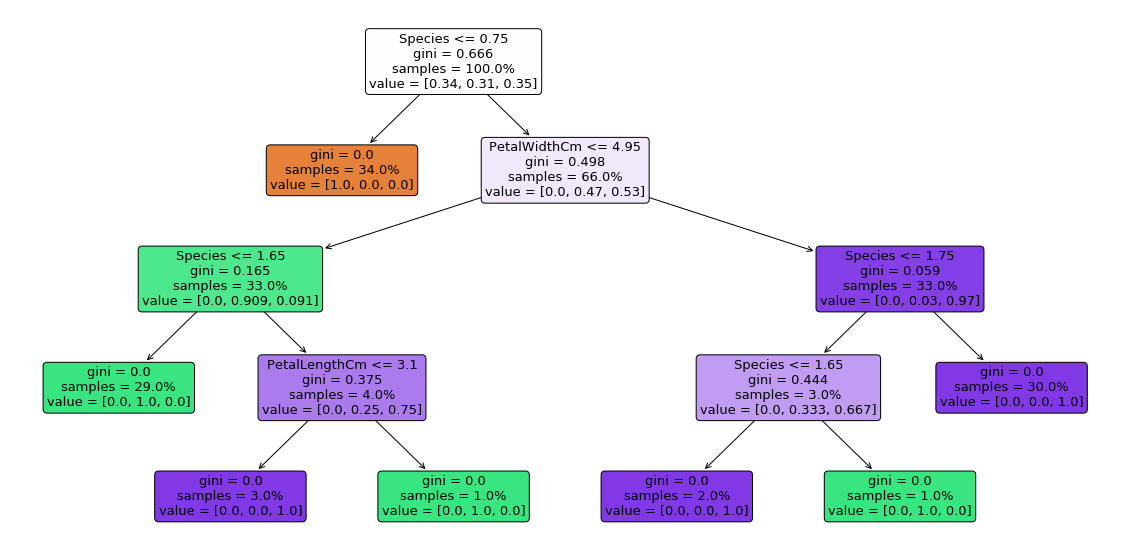

In [23]:
from sklearn import tree
Tree = plt.figure(figsize =(20,10))
Tree = tree.plot_tree(DTT, feature_names = Feature_names,fontsize = 13, filled = 'True',proportion = True, rounded = 10)
plt.show()


# desicion tree is shown and the model is built with great accuracy.

.


In [24]:
# Thank you